# Introduction to statistics in Python 

## Pre-processing techniques for tidy data for statistical analysis

Cleaning and preparing the data for data analyis is the essential first step of any data analysis, which continues for the whole life time of a project as new data is collected and new questions are being investigated. We have to check for outliers and missing values, and most importantnly structure the data to faciliate analysis. 



## Tidy data
A standard form of data structure suitable for further statistical analysis is "tidy data" format. This is when the dataset is arranged such that **each variable is a column, and each observation is a row**. 

Let's get our data semantics right and clarify what we mean by a variable here? 
start with a challenge: The table below shows some data for an experiment with two different treatments tested on three subjects (a full factorial design). How many variables are in the below table, table A-1:


|  | Treatment a | Treatment b
|--------|-------------|--------
| Subject 1  |   6  |  17    
| Subject 2  |   8  |  NA    
| Subject 3  |   4  |  18   

The table has three variables and six observations: 
 1. the subject (with three values)
 2. the treatment (with two values) 
 3. result (with 6 values, if we consider the missing value) 
 
By putting each variable in its own columns and each observation on its own row, we can turn this table into the "tidy" format, which makes it clear which are the variables and observations

|  name | treatment  | result
|--------|-------------|--------
| Subject 1  |   a  |  6    
| Subject 2  |   a  |  8    
| Subject 3  |   a  |  4    
| Subject 1  |   b  |  17    
| Subject 2  |   b  |  NA    
| Subject 3  |   b  |  18    

This is also called a "long" format vs the original form of the table which was "wide". While long and wide are imprecise for describing tidy data but long is usually synonymous to tidy data (you will see below in which a 'long' dataset, table B-1, is not necessarily 'tidy'). To check whether a dataset is tidy, one should check for the definition above where *each variable is a column, and each observation is a row*. Since many data visualization and data wrangling tools in Python expect data to be in a long format, from now on, we stick to `long` and `wide` terms and how to convert from one to the other.  

## Reshaping data
Based on the analysis needed, you need to reshape the data:

 1. when one variable is spread across multiple columns

We already saw this in the above example in which the values for treatment variable were spread in two columns. 
In turning from 'wide' to 'long' we increased the number of rows and decreased the number of columns. The function in `pandas` to do so is `melt`. 

 2. when multiple variables are in one column

such as table B-1:

| person | measure | value |
|--------|---------|-------|
| A      | weight  | 70    |
| A      | height  | 170   |
| A      | age     | 32    |
| B      | weight  | 85    |
| B      | height  | 179   |
| B      | age     | 28    |

when an observation is scattered across multiple rows, we can pivot the table as in table B-2:

| person | weight | height | age |
|--------|--------|--------|-----|
| A      | 70     | 170    | 32  |
| B      | 85     | 179    | 28  |

The function to do so in `pandas` is `pivot`. 


Let's learn the wide range of manipulations of dataframe structure that `pandas` provides, including alternating between the long and wide formats. 
Continuing with the World_data dataset, and to facilitate the visualization of these operations, it is beneficial to create a subset of the data first: 

In [1]:
# let's import the required libraries and the data again:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

In [5]:
world_data_2014 = world_data.loc[world_data.year == 2014]
world_data_2014.head()

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
214,Afghanistan,2014,32800000,Asia,Southern Asia,Low,57.8,1780,4.98,76.1,50.2,0.299,4.04,0.95
433,Albania,2014,2920000,Europe,Southern Europe,Upper middle,77.4,10700,1.71,14.4,107.0,1.960,11.80,12.10
652,Algeria,2014,39100000,Africa,Northern Africa,Upper middle,77.1,13500,2.89,25.6,16.4,3.720,8.38,7.58
871,Angola,2014,26900000,Africa,Sub-Saharan Africa,Lower middle,63.3,6260,5.84,91.2,21.6,1.290,7.11,5.18
1090,Antigua and Barbuda,2014,98900,Americas,Latin America and the Caribbean,High,77.1,19500,2.08,9.0,225.0,5.380,13.10,14.30


### Long to wide with `pivot()` and `pivot_table()`

Let's look at the average CO2 emissions across regions and income_group.

In [35]:
world_data_2014_co2avg = (
    world_data_2014
        .groupby(['region','income_group'])['co2_per_capita']
        .mean()
        .reset_index()
)
world_data_2014_co2avg

,region,income_group,co2_per_capita
0,Africa,High,5.310000
1,Africa,Low,0.206270
2,Africa,Lower middle,0.930375
3,Africa,Upper middle,4.696250
4,Americas,High,9.565000
5,Americas,Low,0.271000
6,Americas,Lower middle,1.204750
7,Americas,Upper middle,2.519375
8,Asia,High,17.914545
9,Asia,Low,0.879667


The data we created is a tidy and long format.

For presentation to humans (e.g. in a paper or poster) the repeating information for `region` and `income_group` makes it hard to follow. For that purpose, a long to wide transformation would be suitable
make a table of the average co2 emission
of the countries based on their region and income. 

the above table can be pivoted into a wide format using the `pivot()` method.
The arguments passed to `pivot()` includes the index, the columns, and which values should populate the table.

In [9]:
world_data_2014_pvt = world_data_2014_co2avg.pivot(
    index='region', columns='income_group', values='co2_per_capita')
world_data_2014_pvt

income_group,High,Low,Lower middle,Upper middle
region,,,,
Africa,5.310000,0.206270,0.930375,4.696250
Americas,9.565000,0.271000,1.204750,2.519375
Asia,17.914545,0.879667,1.564824,6.210769
Europe,6.921429,NaN,3.135000,5.280000
Oceania,13.163333,NaN,0.581000,1.163333


Compare how this table is displayed with the table in the previous cell.

Since presenting summary statistics in a wide format is such a common operation,
`pandas` has a dedicated method,
`pivot_table()`,
that performs both the data aggregation and pivoting.

In [36]:
# notice that we are using world_data_2014 directly: 
world_data_2014.pivot_table(
    index='region', columns='income_group',
    values='co2_per_capita', margins=True
)

income_group,High,Low,Lower middle,Upper middle,All
region,,,,,
Africa,5.310000,0.206270,0.930375,4.696250,1.217987
Americas,9.565000,0.271000,1.204750,2.519375,4.550000
Asia,17.914545,0.879667,1.564824,6.210769,6.588936
Europe,6.921429,NaN,3.135000,5.280000,6.348462
Oceania,13.163333,NaN,0.581000,1.163333,4.530400
All,10.024717,0.327009,1.276767,4.278163,4.508153


With `pivot_table()` it is also possible to change the aggregation function.

In [6]:
world_data_2014.pivot_table(
    index='region', columns='income_group', 
    values='co2_per_capita', margins=True, aggfunc='median'
)

income_group,High,Low,Lower middle,Upper middle,All
region,,,,,
Africa,5.310,0.1470,0.6510,3.540,0.339
Americas,5.065,0.2710,1.0400,2.435,2.590
Asia,15.400,0.7425,1.0600,4.620,3.270
Europe,6.010,NaN,3.1350,4.240,5.870
Oceania,15.400,NaN,0.5795,1.140,1.085
All,6.800,0.1940,0.8920,3.500,2.590


Although `pivot_table()` is the most convenient way to aggregate *and* pivot data,
`pivot()` is still useful to reshape a dataframe from wide to long
*without* aggregating.

The columns and rows can be swapped in the call to `pivot_table()`.
This is useful both to present the table differently
and to perform computations on a different axis of the dataframe
(this result can also be obtained by calling the `transpose()` method).

In [27]:
world_data_2014.pivot_table(index='income_group', columns='region', values='co2_per_capita')

region,Africa,Americas,Asia,Europe,Oceania
income_group,,,,,
High,5.310000,9.565000,17.914545,6.921429,11.495000
Low,0.206270,0.271000,0.879667,NaN,NaN
Lower middle,0.930375,1.204750,1.564824,3.135000,0.581000
Upper middle,4.696250,2.519375,6.210769,5.280000,1.163333


### Wide to long with `melt()`

It is also a common operation to reshape data from the wide to the long format,
to get the data into the most suitable format for analysis.
For this transformation,
the `melt()` method can be used to sweep up a set of columns into one key-value pair.

To prepare the dataframe,
the `income_group` index name can be moved to a column name with the `reset_index()` method.

In [10]:
world_data_2014_pvt

income_group,High,Low,Lower middle,Upper middle
region,,,,
Africa,5.310000,0.206270,0.930375,4.696250
Americas,9.565000,0.271000,1.204750,2.519375
Asia,17.914545,0.879667,1.564824,6.210769
Europe,6.921429,NaN,3.135000,5.280000
Oceania,13.163333,NaN,0.581000,1.163333


In [11]:
world_data_2014_res = world_data_2014_pvt.reset_index()
world_data_2014_res

income_group,region,High,Low,Lower middle,Upper middle
0,Africa,5.310000,0.206270,0.930375,4.696250
1,Americas,9.565000,0.271000,1.204750,2.519375
2,Asia,17.914545,0.879667,1.564824,6.210769
3,Europe,6.921429,NaN,3.135000,5.280000
4,Oceania,13.163333,NaN,0.581000,1.163333


At a minimum,
`melt()` requires the name of the column that should be kept intact.
All remaining columns will have their values in the `value` column
and their name in the `variable` column
(here,
our columns already has the name "income_group",
so this will be used automatically instead of "variable").

In [12]:
world_data_2014_res.melt(id_vars='region')

,region,income_group,value
0,Africa,High,5.310000
1,Americas,High,9.565000
2,Asia,High,17.914545
3,Europe,High,6.921429
4,Oceania,High,13.163333
5,Africa,Low,0.206270
6,Americas,Low,0.271000
7,Asia,Low,0.879667
8,Europe,Low,NaN
9,Oceania,Low,NaN


To be more explicit,
all the arguments to `melt()` can be specified.
This way it is also possible to exclude some columns by omission,
e.g. the income group 'Lower middle'.

In [13]:
world_data_2014_res.melt(id_vars='region', value_vars=['High', 'Low', 'Upper middle'], 
                     var_name='income_group', value_name='co2_per_capita')

,region,income_group,co2_per_capita
0,Africa,High,5.310000
1,Americas,High,9.565000
2,Asia,High,17.914545
3,Europe,High,6.921429
4,Oceania,High,13.163333
5,Africa,Low,0.206270
6,Americas,Low,0.271000
7,Asia,Low,0.879667
8,Europe,Low,NaN
9,Oceania,Low,NaN


>#### Challenge 1
>
> 1. Subset the data to contain only the year 1950
>    and the region Southern Europe.
> 2. Reset the index of this dataframe
>    and assign it to a new variable name
> 3. Create a long dataframe with country as the id column,
>    and the columns `pop_density` and `co2_per_capita`
>    as values in the variable column.

In [7]:
# Challenge solution
# 1.
SE_1950 = world_data.loc[(world_data.year == 1950) & (world_data['sub_region'] == 'Southern Europe')]

# 2.
SE_1950 = SE_1950.reset_index()
SE_1950


,index,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
0,369,Albania,1950,1260000,Europe,Southern Europe,Upper middle,54.5,1920,5.87,280.0,46.1,0.235,NaN,NaN
1,4530,Bosnia and Herzegovina,1950,2660000,Europe,Southern Europe,Upper middle,51.6,1260,5.23,229.0,52.2,NaN,NaN,NaN
2,8691,Croatia,1950,3850000,Europe,Southern Europe,High,59.9,4890,2.95,122.0,68.8,NaN,NaN,NaN
3,13509,Greece,1950,7670000,Europe,Southern Europe,High,67.3,3780,2.36,44.1,59.5,0.539,NaN,NaN
4,17013,Italy,1950,46600000,Europe,Southern Europe,High,65.7,6420,2.45,88.8,158.0,0.890,NaN,NaN
5,20736,"Macedonia, FYR",1950,1250000,Europe,Southern Europe,Upper middle,53.8,2550,4.73,161.0,49.7,NaN,NaN,NaN
6,22050,Malta,1950,312000,Europe,Southern Europe,High,64.8,2550,4.21,74.8,975.0,0.787,NaN,NaN
7,23364,Montenegro,1950,395000,Europe,Southern Europe,Upper middle,61.0,4110,4.32,133.0,29.3,NaN,NaN,NaN
8,28182,Portugal,1950,8420000,Europe,Southern Europe,High,58.7,3850,3.10,143.0,91.9,0.668,NaN,NaN
9,29934,Serbia,1950,6730000,Europe,Southern Europe,Upper middle,59.7,4550,3.59,143.0,77.0,NaN,NaN,NaN


In [8]:
# 3.
SE_1950_subset = SE_1950[['country','pop_density','co2_per_capita']];
SE_1950_subset

,country,pop_density,co2_per_capita
0,Albania,46.1,0.235
1,Bosnia and Herzegovina,52.2,NaN
2,Croatia,68.8,NaN
3,Greece,59.5,0.539
4,Italy,158.0,0.890
5,"Macedonia, FYR",49.7,NaN
6,Malta,975.0,0.787
7,Montenegro,29.3,NaN
8,Portugal,91.9,0.668
9,Serbia,77.0,NaN


In [29]:
SE_1950_long = SE_1950_subset.melt(id_vars='country')
SE_1950_long

,country,variable,value
0,Albania,pop_density,46.100
1,Bosnia and Herzegovina,pop_density,52.200
2,Croatia,pop_density,68.800
3,Greece,pop_density,59.500
4,Italy,pop_density,158.000
5,"Macedonia, FYR",pop_density,49.700
6,Malta,pop_density,975.000
7,Montenegro,pop_density,29.300
8,Portugal,pop_density,91.900
9,Serbia,pop_density,77.000


## Cleaning data
Cleaning data is more than just tidying up the strucutre, we need to deal with missing values, or inconsistencies in data entry, etc. 

`pandas` has many helpful methods for cleaning data,
[an overview can be found in the documentation].
We will explore the most commonly used methods.
First,
let's load a sample dataframe with some dirty raw data that needs cleaning.

[an overview can be found in the documentation]: https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [39]:
url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/raw_dirty_data.csv'
raw_data = pd.read_csv(url)
clean_df = raw_data.copy() # To ensure the original df is not modified
clean_df

,country,year,population,region,income_group,life_expectancy,co2_per_capita
0,Samoa,2011,188000.0,Oceania.Polynesia,Upper middle,71.5,1.070
1,samoa,2012,189000.0,Oceania.Polynesia,Upper middle,no value,NaN
2,Sammoa,2013,191000.0,Oceania.Polynesia,Upper middle,71.6,NaN
3,Samoa,2014,NaN,Oceania.Polynesia,Upper middle,missing,1.030
4,Samia,2015,194000.0,Oceania.Polynesia,Upper middle,71.7,NaN
5,Samoa,2016,195000.0,Oceania.Polynesia,Upper middle,72.0,NaN
6,Tonga,2011,105000.0,Oceania.Polynesia,Upper middle,70.0,0.982
7,Tonga,2012,NaN,Oceania.Polynesia,Upper middle,70.0,1.010
8,Tonga,2013,105000.0,Oceania.Polynesia,Upper middle,70.1,1.080
9,Tonnga,2014,106000.0,Oceania.Polynesia,Upper middle,70.2,1.140


## Dealing with missing values

A robust option for dealing with rows containing missing values,
is to remove them altogether,
which can be done with the `dropna()` method.

In [40]:
clean_df.dropna()

,country,year,population,region,income_group,life_expectancy,co2_per_capita
0,Samoa,2011,188000.0,Oceania.Polynesia,Upper middle,71.5,1.070
6,Tonga,2011,105000.0,Oceania.Polynesia,Upper middle,70.0,0.982
8,Tonga,2013,105000.0,Oceania.Polynesia,Upper middle,70.1,1.080
9,Tonnga,2014,106000.0,Oceania.Polynesia,Upper middle,70.2,1.140


By default all columns are considered.
However,
if the purpose is to study the population changes over time,
it is not desirable to drop rows with valid population values
just because they are missing a co2 measurement.
`dropna()` can therefore be instructed to only consider specific columns.

In [41]:
clean_df.dropna(subset=['population'])

,country,year,population,region,income_group,life_expectancy,co2_per_capita
0,Samoa,2011,188000.0,Oceania.Polynesia,Upper middle,71.5,1.070
1,samoa,2012,189000.0,Oceania.Polynesia,Upper middle,no value,NaN
2,Sammoa,2013,191000.0,Oceania.Polynesia,Upper middle,71.6,NaN
4,Samia,2015,194000.0,Oceania.Polynesia,Upper middle,71.7,NaN
5,Samoa,2016,195000.0,Oceania.Polynesia,Upper middle,72.0,NaN
6,Tonga,2011,105000.0,Oceania.Polynesia,Upper middle,70.0,0.982
8,Tonga,2013,105000.0,Oceania.Polynesia,Upper middle,70.1,1.080
9,Tonnga,2014,106000.0,Oceania.Polynesia,Upper middle,70.2,1.140
10,Tonga,2015,106000.0,Oceania.Polynesia,Upper middle,not given,NaN
11,Tonga,2016,107000.0,Oceania.Polynesia,Upper middle,70.4,NaN


A common alternative to removing rows containing `NA` values
is to fill out the values with for example
the mean of all observations or the previous non-NA value.
This can be done with the `fillna()` method.

In [42]:
# Fill missing values with mean value for that column
raw_data.fillna(raw_data.mean())

,country,year,population,region,income_group,life_expectancy,co2_per_capita
0,Samoa,2011,188000.0,Oceania.Polynesia,Upper middle,71.5,1.070
1,samoa,2012,189000.0,Oceania.Polynesia,Upper middle,no value,1.052
2,Sammoa,2013,191000.0,Oceania.Polynesia,Upper middle,71.6,1.052
3,Samoa,2014,148600.0,Oceania.Polynesia,Upper middle,missing,1.030
4,Samia,2015,194000.0,Oceania.Polynesia,Upper middle,71.7,1.052
5,Samoa,2016,195000.0,Oceania.Polynesia,Upper middle,72.0,1.052
6,Tonga,2011,105000.0,Oceania.Polynesia,Upper middle,70.0,0.982
7,Tonga,2012,148600.0,Oceania.Polynesia,Upper middle,70.0,1.010
8,Tonga,2013,105000.0,Oceania.Polynesia,Upper middle,70.1,1.080
9,Tonnga,2014,106000.0,Oceania.Polynesia,Upper middle,70.2,1.140


In this case,
it would have been better to calculate and fill with a separate mean value for each country.
Another way of filling values
is to copy the previous or next value.
This is especially relevant in time series
where the values are ordered chronologically.

In [43]:
# Fill with previews non-null value
raw_data.fillna(method='ffill')

,country,year,population,region,income_group,life_expectancy,co2_per_capita
0,Samoa,2011,188000.0,Oceania.Polynesia,Upper middle,71.5,1.070
1,samoa,2012,189000.0,Oceania.Polynesia,Upper middle,no value,1.070
2,Sammoa,2013,191000.0,Oceania.Polynesia,Upper middle,71.6,1.070
3,Samoa,2014,191000.0,Oceania.Polynesia,Upper middle,missing,1.030
4,Samia,2015,194000.0,Oceania.Polynesia,Upper middle,71.7,1.030
5,Samoa,2016,195000.0,Oceania.Polynesia,Upper middle,72.0,1.030
6,Tonga,2011,105000.0,Oceania.Polynesia,Upper middle,70.0,0.982
7,Tonga,2012,105000.0,Oceania.Polynesia,Upper middle,70.0,1.010
8,Tonga,2013,105000.0,Oceania.Polynesia,Upper middle,70.1,1.080
9,Tonnga,2014,106000.0,Oceania.Polynesia,Upper middle,70.2,1.140


An often more suitable approach for time series,
is to interpolate the missing values from nearby values.
The default interpolation method is to linearly estimate the values,
but there are many more options,
such as giving various weight to values
depending on how close they are to the missing value.

In [44]:
clean_df.interpolate(limit_direction='both')

,country,year,population,region,income_group,life_expectancy,co2_per_capita
0,Samoa,2011,188000.0,Oceania.Polynesia,Upper middle,71.5,1.070000
1,samoa,2012,189000.0,Oceania.Polynesia,Upper middle,no value,1.056667
2,Sammoa,2013,191000.0,Oceania.Polynesia,Upper middle,71.6,1.043333
3,Samoa,2014,192500.0,Oceania.Polynesia,Upper middle,missing,1.030000
4,Samia,2015,194000.0,Oceania.Polynesia,Upper middle,71.7,1.014000
5,Samoa,2016,195000.0,Oceania.Polynesia,Upper middle,72.0,0.998000
6,Tonga,2011,105000.0,Oceania.Polynesia,Upper middle,70.0,0.982000
7,Tonga,2012,105000.0,Oceania.Polynesia,Upper middle,70.0,1.010000
8,Tonga,2013,105000.0,Oceania.Polynesia,Upper middle,70.1,1.080000
9,Tonnga,2014,106000.0,Oceania.Polynesia,Upper middle,70.2,1.140000


Whether to use `dropna()`, `fillna()`, or `interpolate()`
depends on the data set and the purpose of the analysis.

## Cleaning string columns

Dataframes have plenty of built-in [string methods]
and many of these are helpful
when handling typos and text formatting.
For example,
we can format the `income_group` column to consistency use lower case characters.

[string methods]: https://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

In [45]:
clean_df['income_group'].str.lower()

0     upper middle
1     upper middle
2     upper middle
3     upper middle
4     upper middle
5     upper middle
6     upper middle
7     upper middle
8     upper middle
9     upper middle
10    upper middle
11    upper middle
Name: income_group, dtype: object

The space in some values can be replaced with an underscore.

In [46]:
clean_df['income_group'].str.lower().str.replace(' ', '-')

0     upper-middle
1     upper-middle
2     upper-middle
3     upper-middle
4     upper-middle
5     upper-middle
6     upper-middle
7     upper-middle
8     upper-middle
9     upper-middle
10    upper-middle
11    upper-middle
Name: income_group, dtype: object

The returned series can be assigned to a column in the dataframe.

In [47]:
clean_df['income_group'] = clean_df['income_group'].str.lower().str.replace(' ', '-')
clean_df

,country,year,population,region,income_group,life_expectancy,co2_per_capita
0,Samoa,2011,188000.0,Oceania.Polynesia,upper-middle,71.5,1.070
1,samoa,2012,189000.0,Oceania.Polynesia,upper-middle,no value,NaN
2,Sammoa,2013,191000.0,Oceania.Polynesia,upper-middle,71.6,NaN
3,Samoa,2014,NaN,Oceania.Polynesia,upper-middle,missing,1.030
4,Samia,2015,194000.0,Oceania.Polynesia,upper-middle,71.7,NaN
5,Samoa,2016,195000.0,Oceania.Polynesia,upper-middle,72.0,NaN
6,Tonga,2011,105000.0,Oceania.Polynesia,upper-middle,70.0,0.982
7,Tonga,2012,NaN,Oceania.Polynesia,upper-middle,70.0,1.010
8,Tonga,2013,105000.0,Oceania.Polynesia,upper-middle,70.1,1.080
9,Tonnga,2014,106000.0,Oceania.Polynesia,upper-middle,70.2,1.140


Note that the NA values are still around
because the original dataframe was never overwritten
with a modified one without NA values.

To find spelling mistakes the `unique()` method is useful.

In [48]:
clean_df['country'].unique()

array(['Samoa', 'samoa', 'Sammoa', 'Samia', 'Tonga', 'Tonnga'],
      dtype=object)

The `replace()` method can be used here again,
this time replacing several spelling mistakes simultaneously.

In [50]:
(clean_df['country']
     .str.replace('samoa|Samia', 'Samoa')
     .str.replace('Tonnga', 'Tonga')
     .unique()
) # reminder: we're using a paranthesis to be able to devide the code into several lines

array(['Samoa', 'Sammoa', 'Tonga'], dtype=object)

The `|` bar means `or`,
similar to how we saw it used previously with `loc[]`.
Using a `|` in a string works
because the `str.replace()` method supports "regular expressions".
This is a powerful way of using strings as search operators,
such as with `|`,
rather than interpreting them literally.

A more intricate regular expression
can replace everything starting with `S` or `s` with `Samoa`
and every word starting with `T` with `Tongo`:

In [51]:
(clean_df['country']
     .str.replace('[S,s].*', 'Samoa') # .* means "any sequence of characters
     .str.replace('T.*', 'Tonga')
     .unique()
)

array(['Samoa', 'Tonga'], dtype=object)

Entire books have been written on regular expressions
and covering them fully here is outside the scope of this tutorial.
However,
it is useful to know about `|`
(and to a lesser extent `[]` and `.*`),
when replacing misspelled words.

Another common data cleaning operation
is to split one column into two
to have one measurement per column (an attribute of a tidy dataset that we covered above).
This can be done via `str.split()`.

In [52]:
clean_df['region'].str.split('.')

0     [Oceania, Polynesia]
1     [Oceania, Polynesia]
2     [Oceania, Polynesia]
3     [Oceania, Polynesia]
4     [Oceania, Polynesia]
5     [Oceania, Polynesia]
6     [Oceania, Polynesia]
7     [Oceania, Polynesia]
8     [Oceania, Polynesia]
9     [Oceania, Polynesia]
10    [Oceania, Polynesia]
11    [Oceania, Polynesia]
Name: region, dtype: object

The returned object is a series where each row is a list of two values.
This cannot be assigned to two columns in the dataframe,
since only a single series is returned.
To get around this,
we can append `str` to the expression,
which now returns two series,
so that we can assign the first item of each list to the first specified column
and the second item to the second specified column.

In [53]:
clean_df['region'], clean_df['sub_region'] = clean_df['region'].str.split('.').str
clean_df
# To get only one of the list items, use indexing
# clean_df['region'], clean_df['sub_region'] = clean_df['region'].str.split('.').str[0]

,country,year,population,region,income_group,life_expectancy,co2_per_capita,sub_region
0,Samoa,2011,188000.0,Oceania,upper-middle,71.5,1.070,Polynesia
1,samoa,2012,189000.0,Oceania,upper-middle,no value,NaN,Polynesia
2,Sammoa,2013,191000.0,Oceania,upper-middle,71.6,NaN,Polynesia
3,Samoa,2014,NaN,Oceania,upper-middle,missing,1.030,Polynesia
4,Samia,2015,194000.0,Oceania,upper-middle,71.7,NaN,Polynesia
5,Samoa,2016,195000.0,Oceania,upper-middle,72.0,NaN,Polynesia
6,Tonga,2011,105000.0,Oceania,upper-middle,70.0,0.982,Polynesia
7,Tonga,2012,NaN,Oceania,upper-middle,70.0,1.010,Polynesia
8,Tonga,2013,105000.0,Oceania,upper-middle,70.1,1.080,Polynesia
9,Tonnga,2014,106000.0,Oceania,upper-middle,70.2,1.140,Polynesia


To get rid of certain rows or columns,
the `drop()` method can be used.

In [54]:
clean_df.drop(index=[1, 4, 5], columns=['region', 'year', 'country'])

,population,income_group,life_expectancy,co2_per_capita,sub_region
0,188000.0,upper-middle,71.5,1.070,Polynesia
2,191000.0,upper-middle,71.6,NaN,Polynesia
3,NaN,upper-middle,missing,1.030,Polynesia
6,105000.0,upper-middle,70.0,0.982,Polynesia
7,NaN,upper-middle,70.0,1.010,Polynesia
8,105000.0,upper-middle,70.1,1.080,Polynesia
9,106000.0,upper-middle,70.2,1.140,Polynesia
10,106000.0,upper-middle,not given,NaN,Polynesia
11,107000.0,upper-middle,70.4,NaN,Polynesia


> # Challenge
>
> 1. Create a new dataframe called `world_data_co2` from the `world_data` data
>    that contains only the `country`, `year`, `population`, 'region', and `co2_per_capita` columns and no NA values in the 'co2_per_capita' column.
> 2. Remember that United States has two measurements, one as in Americas region, and one in Oceania. Replace the Oceania with Americas for all United States measurements. 

In [85]:
world_data_co2 = world_data[['country','year','region','population','co2_per_capita']]
world_data_co2 = world_data_co2.dropna(subset = ['co2_per_capita'])
world_data_co2

,country,year,region,population,co2_per_capita
149,Afghanistan,1949,Asia,7660000,0.00191
150,Afghanistan,1950,Asia,7750000,0.01090
151,Afghanistan,1951,Asia,7840000,0.01170
152,Afghanistan,1952,Asia,7930000,0.01150
153,Afghanistan,1953,Asia,8040000,0.01320
...,...,...,...,...,...
39192,Zimbabwe,2010,Africa,14100000,0.55200
39193,Zimbabwe,2011,Africa,14400000,0.66500
39194,Zimbabwe,2012,Africa,14700000,0.53000
39195,Zimbabwe,2013,Africa,15100000,0.77600


In [86]:
# reminder that United states is also measured under Oceania
world_data_co2.country[world_data_co2.region == 'Oceania'].unique()

array(['Australia', 'Fiji', 'Kiribati', 'New Zealand', 'Papua New Guinea',
       'Samoa', 'Solomon Islands', 'Tonga', 'United States', 'Vanuatu'],
      dtype=object)

In [87]:
# let's make an auxilary variable 
region_USrows = world_data_co2.region[world_data_co2.country =='United States']
# replace and put back in the same rows 
world_data_co2.region[world_data_co2.country =='United States'] = region_USrows.str.replace('Oceania', 'Americas')
world_data_co2

,country,year,region,population,co2_per_capita
149,Afghanistan,1949,Asia,7660000,0.00191
150,Afghanistan,1950,Asia,7750000,0.01090
151,Afghanistan,1951,Asia,7840000,0.01170
152,Afghanistan,1952,Asia,7930000,0.01150
153,Afghanistan,1953,Asia,8040000,0.01320
...,...,...,...,...,...
39192,Zimbabwe,2010,Africa,14100000,0.55200
39193,Zimbabwe,2011,Africa,14400000,0.66500
39194,Zimbabwe,2012,Africa,14700000,0.53000
39195,Zimbabwe,2013,Africa,15100000,0.77600


In [88]:
# to confirm: now if we look at the countries in Oceania, US is not among them
world_data_co2.country[world_data_co2.region == 'Oceania'].unique()

array(['Australia', 'Fiji', 'Kiribati', 'New Zealand', 'Papua New Guinea',
       'Samoa', 'Solomon Islands', 'Tonga', 'Vanuatu'], dtype=object)

# Statistical Analysis in Python 

Scipy is the libary in Python that has many modules for statistical analysis, along with other scientific computing modlues. 
For this section we use data from the Scipy lectures. 
The CSV file is observations of brain size and weight and IQ collected across male and female subjects. 

In [2]:
# let's first import the libaries and data that we need 
import pandas as pd
import seaborn as sns

from scipy import stats

In [4]:
data = pd.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', 
                   delimiter=';', index_col=0, na_values='.') # the na_values='.' creates NaN values whereever there is a missing value
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


where FSIQ and VIO and PIQ are mean intelligence quotients: Full scale IQ, Verbal IQ, and Performance IQ. 

In [12]:
# how many observations do we have? use pandas df.shape attribute
data.shape

(40, 7)

## Hypothesis Testing

### One-sample t-test: Testing the value of a population mean. 

`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to   
be equal to a given value (technically if observations are drawn from a Gaussian  
distributions of given population mean). It returns the T statistic, and the   
p-value (see the function’s help)

let's visualise the distributions of the IQs first: 

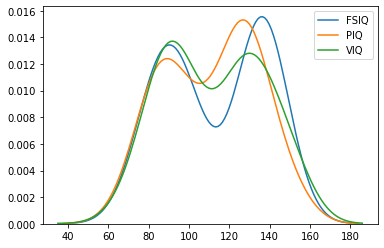

In [5]:
sns.kdeplot(data['FSIQ'])
sns.kdeplot(data['PIQ'])
sns.kdeplot(data['VIQ'])

Now run a 1-sample t-test for zero mean for VIQ

In [6]:
stats.ttest_1samp(data['VIQ'], 0)   

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

### Two-sample t-test: testing for difference across populations
To examine whether the average VIQ in the male and female samples in the 40 subjects were different, we do a 2-sample t-test with `scipy.stats.ttest_ind()`

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

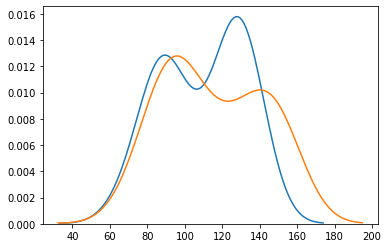

In [16]:
female_viq = data.loc[data['Gender'] == 'Female']['VIQ']
male_viq = data.loc[data['Gender'] == 'Male']['VIQ']

sns.kdeplot(female_viq, legend=False)
sns.kdeplot(male_viq, legend=False)

stats.ttest_ind(female_viq, male_viq)   



The high p-value doesn't indicate a difference in the mean of the distributions, which is observed from the plots

###  Paired tests: repeated measurements on the same indivuals

The PIQ, VIQ and FSIQ are three different measures of IQ in the same individual.   
We can first look if FSIQ and PIQ are different using the 2-sample t-test.

In [17]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])  

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

However this doesn't account for individual differences contributing to variance in data.  
We can use a **paired t-test** or **repeated measures test** to account for these individual differences.

In [19]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

This is actually equivalent to doing a 1-sample t-test on the difference of the two measures.

In [20]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

These tests assume normality in the data. A non-parametric alternative is the Wilcoxian signed rank test

In [21]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])   

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

Note: 
The corresponding test in the non paired case is the Mann–Whitney U test, `scipy.stats.mannwhitneyu()`. 

## Analysis of variance (ANOVA)

### 1-Way Anova
If the t-test compares the means of a condition between 2 groups, ANOVA compares the means of a condition between more than groups.

Reminder that ANOVA tests if there is a difference in the mean somewhere in the model (testing if there was an overall effect), but it does not tell where the difference is. Post-hoc tests are needed to find out where the difference is. 

We can perform ANOVA either using Scipy or Statsmodels libraries, here we cover Scipy. 

In [68]:
# reminder for the data
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


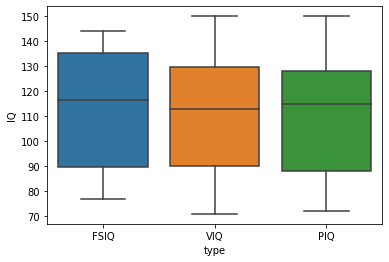

In [80]:
# visualized the distributions we are interested in
iq_melt = pd.melt(data, value_vars=['FSIQ', 'VIQ', 'PIQ'], value_name='IQ', var_name="type")
iq_melt
sns.boxplot(x = 'type', y = 'IQ', data=iq_melt)

In [77]:
f_value, p_value = stats.f_oneway(data.FSIQ, data.VIQ, data.PIQ)

In [78]:
print(f_value, p_value)

0.10770937049630455 0.8979774381447481


remember that ANOVA has some underlying assumptions: 
- Normality
- Homogeneity of variance
- Independent observations

If these assumptions are not met, you have to either transform the data, or use alternative tests such as Kruskal-Wallis.

We will continue on Stats and an entrance to machine learning next week

### Acknowledgmenets
- Wickham, Hadley . "Tidy Data." Journal of Statistical Software [Online], 59.10 (2014): 1 - 23.
- https://scipy-lectures.org/packages/statistics/index.html